In [15]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch.utils.data import DataLoader

In [2]:
train_dataset =torchvision.datasets.CIFAR10(root='./data', 
                                           train=True, 
                                           download=True,
                                           transform = transforms.ToTensor())

C:\Users\pponi\Documents\python\.env\Lib\site-packages\torchvision\datasets\cifar.py:83: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  entry = pickle.load(f, encoding="latin1")


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


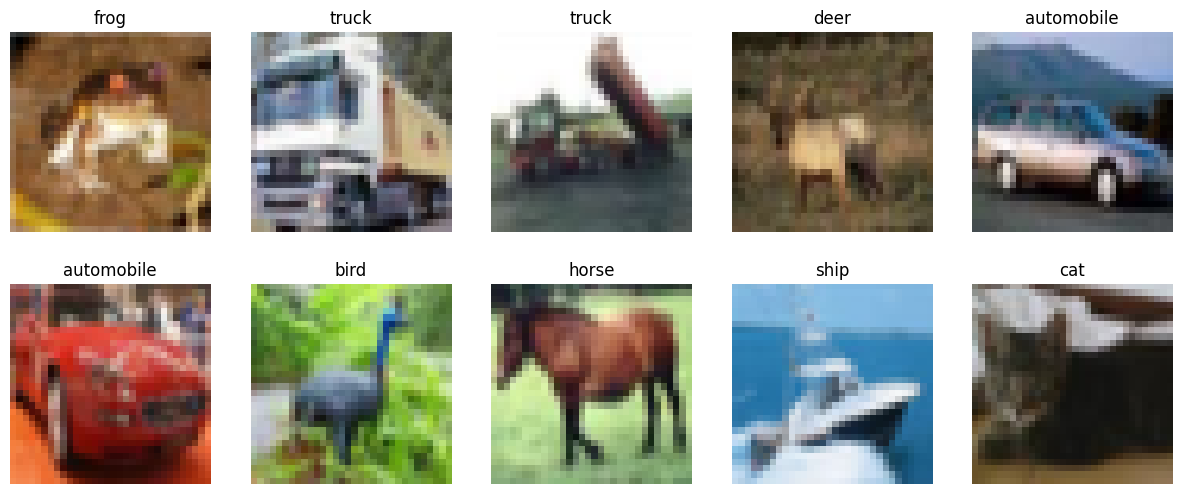

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()
class_names = train_dataset.classes if hasattr(train_dataset, 'classes') else None
for i in range(10):
    img,label = train_dataset[i]
    ax = axes[i]
    img_to_show = img.permute(1,2,0)
    ax.imshow(img_to_show)
    title = class_names[label] if class_names else str(label)
    ax.set_title(title)
    ax.axis('off')


In [5]:
BATCH_SIZE = 128
SHUFFLE = True
dataloader = DataLoader(dataset = train_dataset,shuffle = SHUFFLE,batch_size = BATCH_SIZE)

In [16]:
class ImageNet(nn.Module):
    def __init__(self):
        super(ImageNet,self).__init__()
        self.C1 = nn.Conv2d(in_channels = 3,out_channels = 96, kernel_size = 11,stride = 4, padding=2)
        self.MP2 = nn.MaxPool2d(kernel_size = 3,stride = 2)
        self.C3 = nn.Conv2d(in_channels = 96, out_channels = 256, kernel_size = 5, padding = 2)
        self.MP4 = nn.MaxPool2d(kernel_size = 3, stride = 2)
        self.C5 = nn.Conv2d(in_channels = 256, out_channels = 384, kernel_size = 3, padding = 1)
        self.C6 = nn.Conv2d(in_channels = 384, out_channels = 384, kernel_size = 3, padding = 1)
        self.C7 = nn.Conv2d(in_channels = 384, out_channels = 256, kernel_size = 3, padding = 1)
        self.MP8 = nn.MaxPool2d(kernel_size = 3, stride = 2)
        
        self.dropout =  nn.Dropout(p=0.5)
        self.D1 = nn.Linear(256*6*6, 4096)
        self.D2 = nn.Linear(4096,4096)
        self.D3 = nn.Linear(4096,1000)

    

    def forward(self,x):
        x = self.C1(x)
        x = F.relu(x, inplace=True) 
        x = self.MP2(x)
        
        
        x = self.C3(x)
        x = F.relu(x, inplace=True)
        x = self.MP4(x)
        
        
        x = F.relu(self.C5(x), inplace=True)
        x = F.relu(self.C6(x), inplace=True)
        x = F.relu(self.C7(x), inplace=True)
        x = self.MP8(x)
        
        
        x = torch.flatten(x, 1)
        
      
        x = self.D1(x)
        x = F.relu(x, inplace=True)
        x = self.dropout(x)
        
        x = self.D2(x)
        x = F.relu(x, inplace=True)
        x = self.dropout(x)
        
        x = self.D3(x)
        
        return x
        

In [17]:
model = ImageNet()


torch.Size([1, 1000])